In [20]:
import os, glob
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
data_dir = "/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x"

In [3]:
def fast_scandir(dirname):
    """ gets all folders recursively """
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders

In [4]:
os.listdir(data_dir)

['elastix',
 'cell__downsized_for_atlas.tif',
 'TileSettings.ini',
 'Ex_488_Em_0_stitched_test',
 'Ex_642_Em_2_stitched',
 'Ex_642_Em_2_corrected',
 'Ex_488_Em_0_stitched',
 'Ex_488_Em_0_backup',
 'cell__downsized',
 'metadata.txt',
 'cell__downsized_for_atlas_MAX.tif',
 'Ex_642_Em_2',
 'reg__downsized_for_atlas_MAX.tif',
 'Ex_488_Em_0',
 'Ex_488_Em_0_corrected',
 'reg__downsized',
 'reg__downsized_for_atlas.tif']

In [ ]:
cell_downsized_file = os.path.join(data_dir,"cell__downsized_for_atlas.tif")


In [46]:
cell_downsized_file = os.path.join(data_dir,"cell__downsized_for_atlas.tif")
cell_downsized = tifffile.imread(cell_downsized_file)

In [50]:
reg_downsized_file = os.path.join(data_dir,"reg__downsized_for_atlas.tif")
reg_downsized = tifffile.imread(reg_downsized_file)

In [50]:
aligned_to_atl_file = os.path.join(data_dir,'elastix/reg_to_atl/result.3.tif')
aligned_to_atl = tifffile.imread(aligned_to_atl_file)

In [51]:
aligned_to_atl.shape

(618, 1150, 385)

In [58]:
reg_downsized.shape

(865, 1610, 539)

In [ ]:
z=363
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(aligned_to_atl[z],vmin=0,vmax=1000,cmap='gray')

508


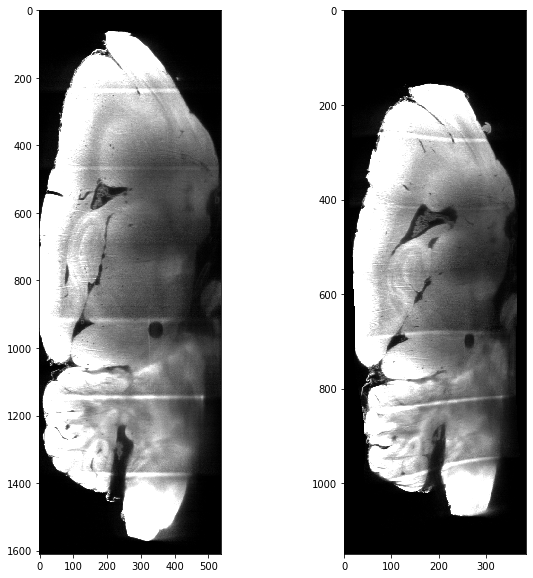

In [63]:
z_atl = 363
z_downsized = int(z_atl/aligned_to_atl.shape[0]*reg_downsized.shape[0])
print(z_downsized)
fig = plt.figure(figsize=(10,10))
ax_downsized = fig.add_subplot(1,2,1)
ax_reg = fig.add_subplot(1,2,2)

ax_downsized.imshow(reg_downsized[z_downsized],vmin=0,vmax=1000,cmap='gray')
ax_reg.imshow(aligned_to_atl[z_atl],vmin=0,vmax=1000,cmap='gray')

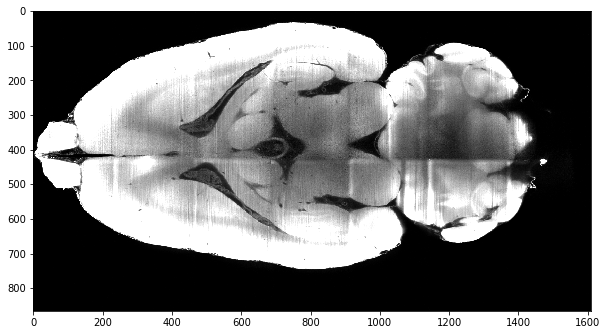

In [51]:
x_downsized = 200
fig = plt.figure(figsize=(10,10))
ax_downsized = fig.add_subplot(1,1,1)

ax_downsized.imshow(reg_downsized[:,:,x_downsized],vmin=0,vmax=1000,cmap='gray')


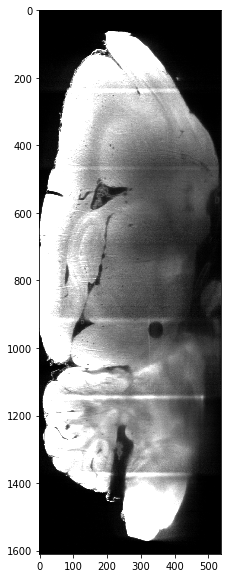

In [53]:
z_downsized = 508
fig = plt.figure(figsize=(10,10))
ax_downsized = fig.add_subplot(1,1,1)

ax_downsized.imshow(reg_downsized[z_downsized],vmin=0,vmax=1000,cmap='gray')


## Try to run pystripe without a flat on the sagittal sections

In [70]:
import pystripe
from itertools import product


In [94]:
pystripe.filter_streaks?

In [98]:
img.shape

(1610, 539)

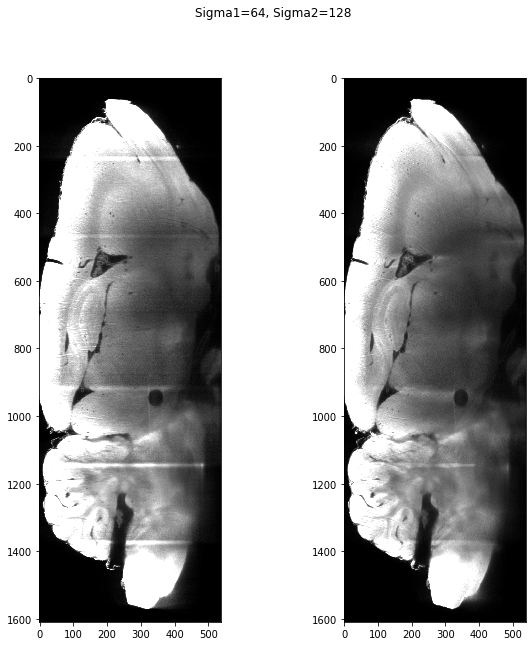

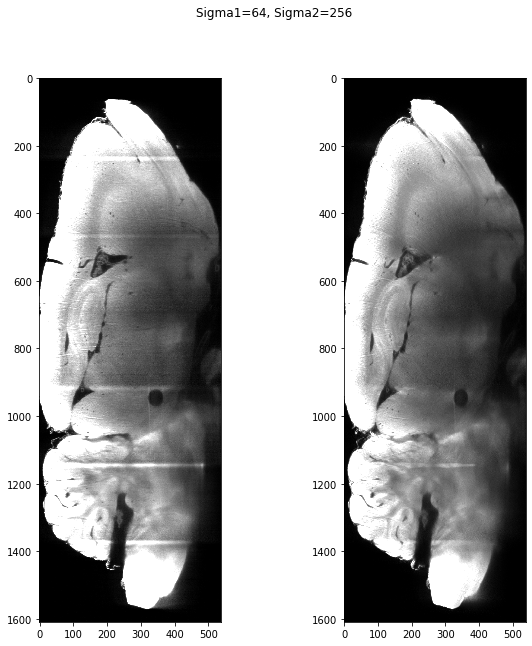

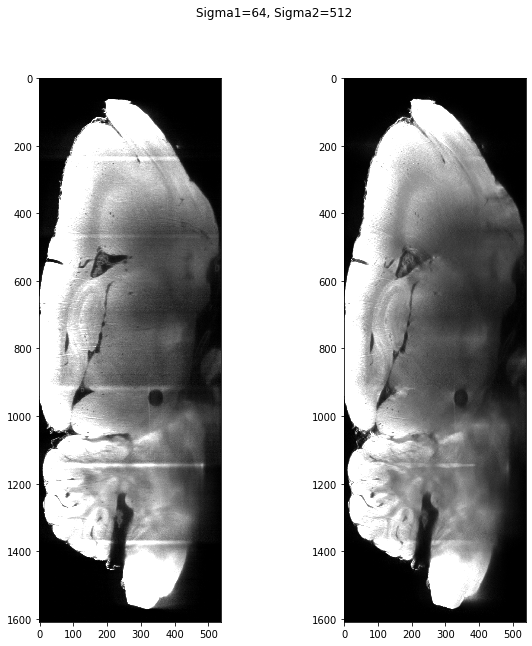

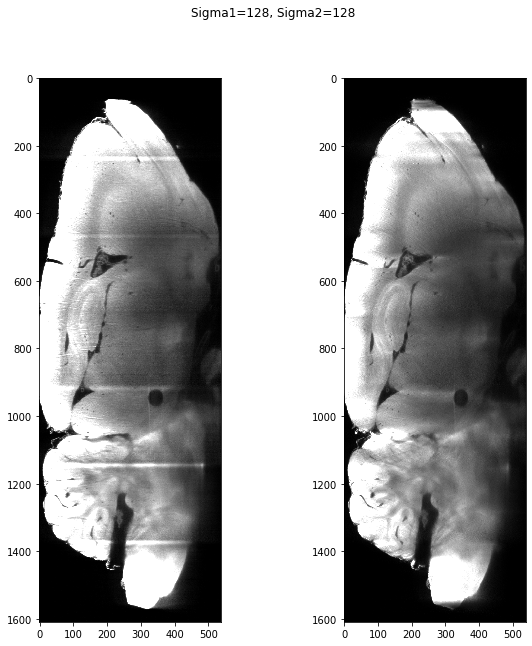

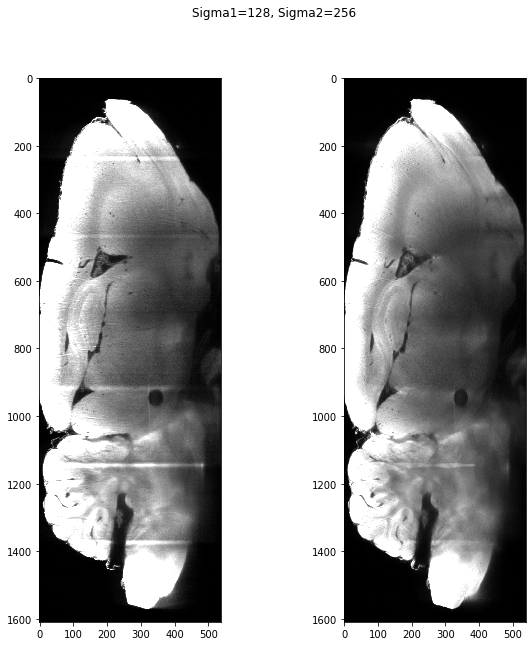

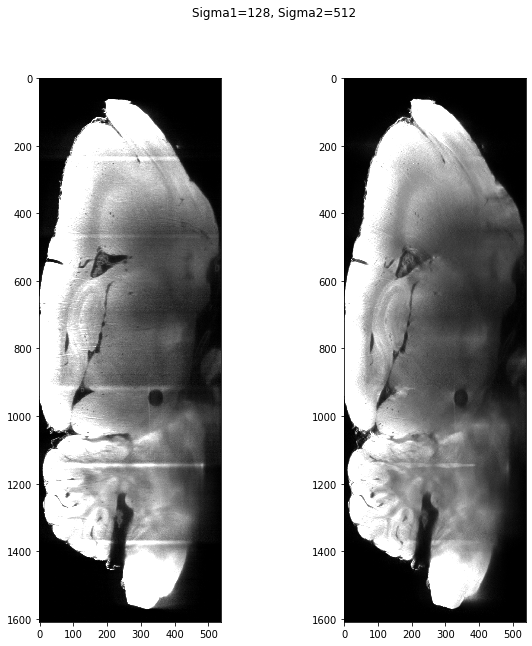

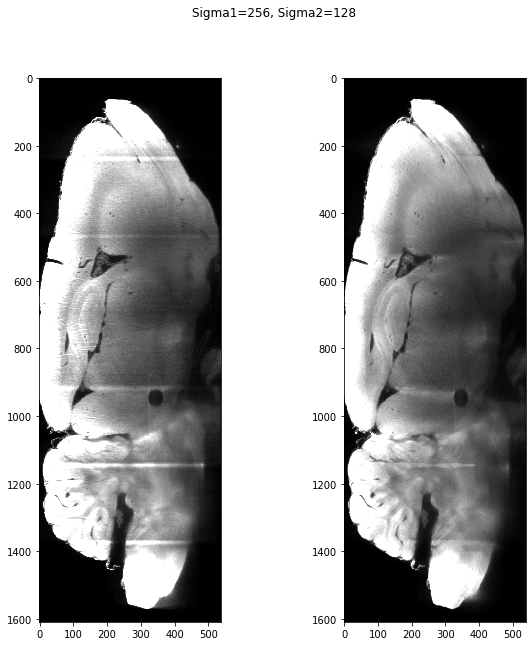

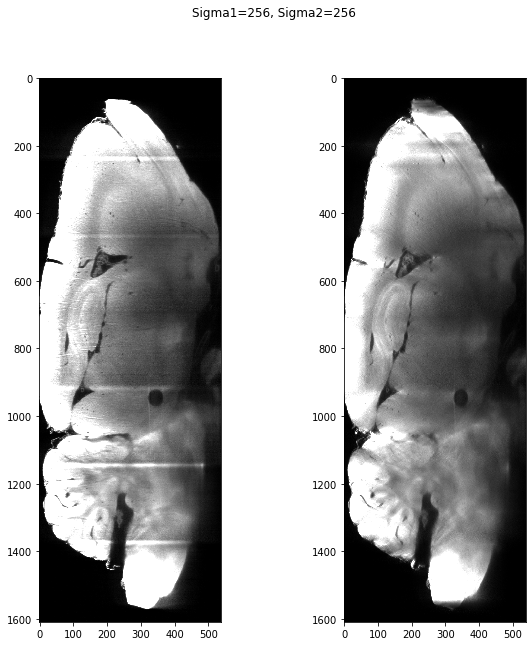

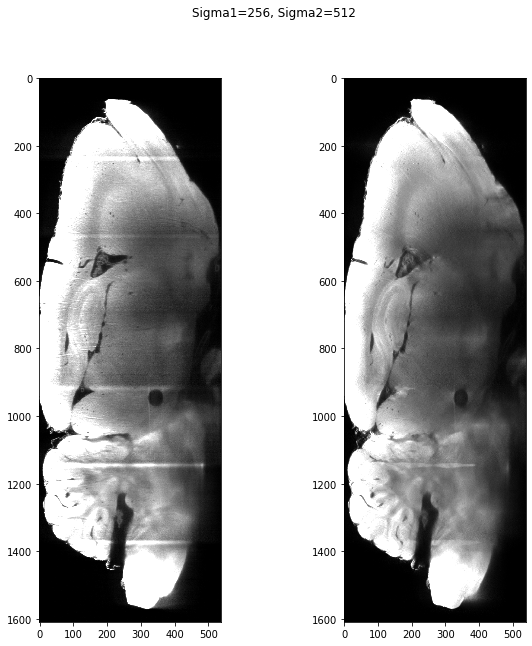

In [97]:
sigma1_list=[64,128,256]
sigma2_list=[128,256,512]
parameter_list = list(product(sigma1_list,sigma2_list))
for ii,(sigma1,sigma2) in enumerate(parameter_list):
    fimg = pystripe.filter_streaks(img, sigma=[sigma1,sigma2], wavelet='db3')
    fig = plt.figure(figsize=(10,10))
    ax_downsized = fig.add_subplot(1,2,1)
    ax_downsized.imshow(img,vmin=0,vmax=1000,cmap='gray')
    ax_pystripe = fig.add_subplot(1,2,2)
    ax_pystripe.imshow(fimg,vmin=0,vmax=1200,cmap='gray')
    fig.suptitle(f"Sigma1={sigma1}, Sigma2={sigma2}")


In [88]:
pystripe.filter_streaks?

In [87]:
# filter a single image
img = reg_downsized[508]
fimg = pystripe.filter_streaks(img, sigma=[128, 256], wavelet='db2')

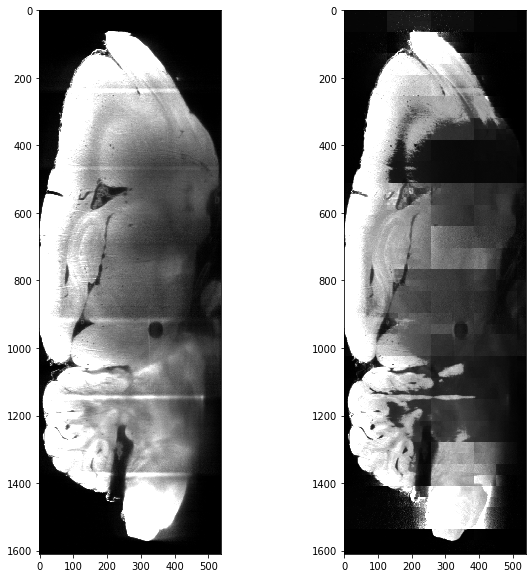

In [86]:
fig = plt.figure(figsize=(10,10))
ax_downsized = fig.add_subplot(1,2,1)
ax_downsized.imshow(img,vmin=0,vmax=1000,cmap='gray')
ax_pystripe = fig.add_subplot(1,2,2)
ax_pystripe.imshow(fimg,vmin=0,vmax=1200,cmap='gray')


In [65]:
reg_downsized.shape

(865, 1610, 539)

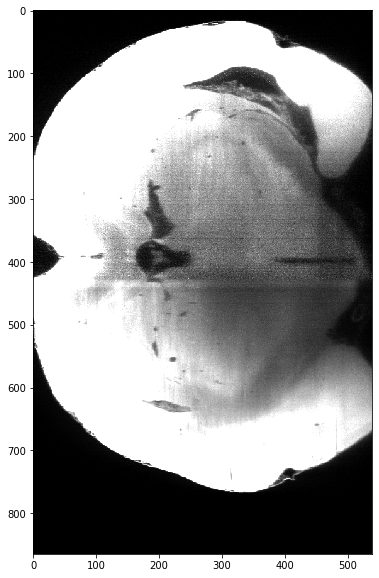

In [71]:
z_downsized = 700
fig = plt.figure(figsize=(10,10))
ax_downsized = fig.add_subplot(1,1,1)

ax_downsized.imshow(reg_downsized[:,z_downsized,:],vmin=0,vmax=600,cmap='gray')


In [64]:
len(ch642_planes)

3785

In [10]:
ch642_corrected_dir = os.path.join(data_dir,"Ex_642_Em_2_corrected")

In [13]:
ch642_corrected_dir = fast_scandir(ch642_corrected_dir)[-1]

In [14]:
ch642_corrected_dir

'/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(10590x7592x3785)/076490/076490_095390'

In [19]:
ch642_planes = sorted(glob.glob(ch642_corrected_dir + '/*tif'))

In [20]:
ch642_planes

['/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(10590x7592x3785)/076490/076490_095390/076490_095390_000000.tif',
 '/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(10590x7592x3785)/076490/076490_095390/076490_095390_000020.tif',
 '/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(10590x7592x3785)/076490/076490_095390/076490_095390_000040.tif',
 '/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/Ex_642_Em_2_corrected/RES(10590x7592x3785)/076490/076490_095390/076490_095390_000060.tif',
 '/jukebox/LightSheetData/lightserv/pbibawi/pb_udisco_647_488/pb_udisco_647_488_M128/imaging_request_1/rawdata/resolution_3.6x/E

In [21]:
len(ch642_planes)

3785

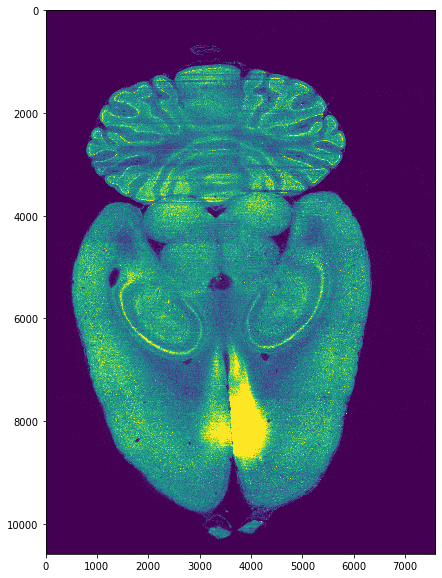

In [27]:
z=1000
z_plane = tifffile.imread(ch642_planes[z])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(z_plane,vmin=0,vmax=500)

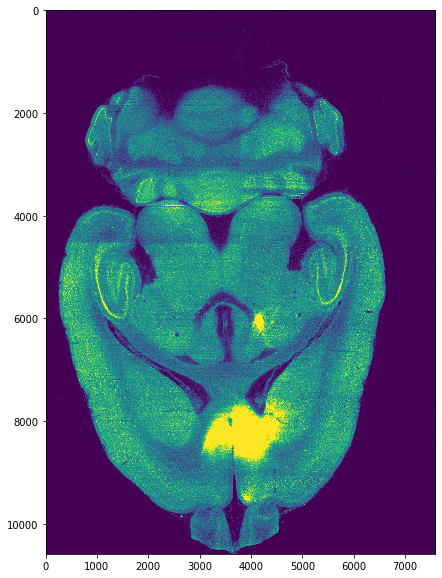

In [29]:
z=1500
z_plane = tifffile.imread(ch642_planes[z])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(z_plane,vmin=0,vmax=500)

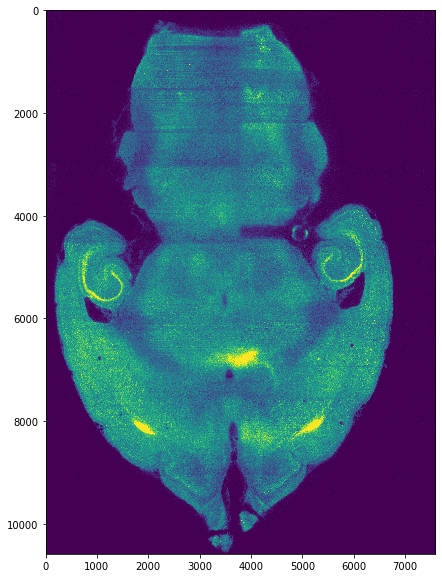

In [32]:
z=2500
z_plane = tifffile.imread(ch642_planes[z])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(z_plane,vmin=0,vmax=500)

In [5]:
ch488_stitched_dir = os.path.join(data_dir,"Ex_488_Em_0_stitched_test")

In [6]:
ch488_stitched_dir = fast_scandir(ch488_stitched_dir)[-1]

In [9]:
ch488_stitched_z_planes = sorted(glob.glob(ch488_stitched_dir + '/*tif'))

In [10]:
z=500
z_plane = tifffile.imread(ch488_stitched_z_planes[z])

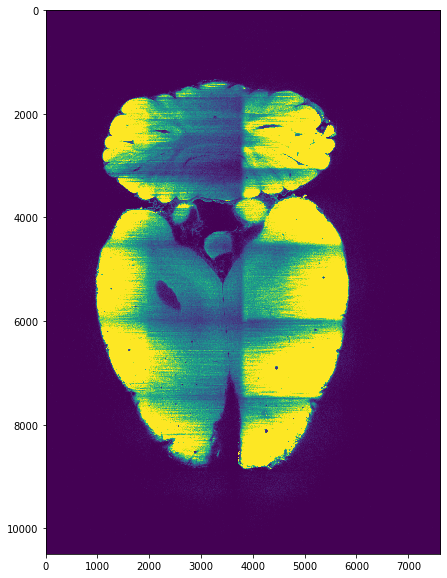

In [12]:
z=500
z_plane = tifffile.imread(ch488_stitched_z_planes[z])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(z_plane,vmin=0,vmax=800)

In [13]:
z_plane.shape

(10492, 7613)

In [21]:
cv2.resize?

In [33]:
subvol = np.zeros((500,1000,700))
for ii,z in enumerate(range(500,1000)):
    print(z)
    z_plane = tifffile.imread(ch488_stitched_z_planes[z])
    res = cv2.resize(z_plane, dsize=(700, 1000), interpolation=cv2.INTER_CUBIC)
    subvol[ii] = res

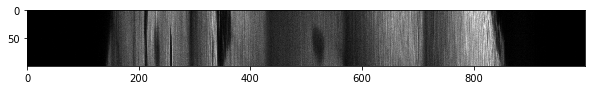

In [41]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(subvol[:,:,400],vmin=0,vmax=2000,cmap='gray')

In [31]:
res.shape

(1000, 700)

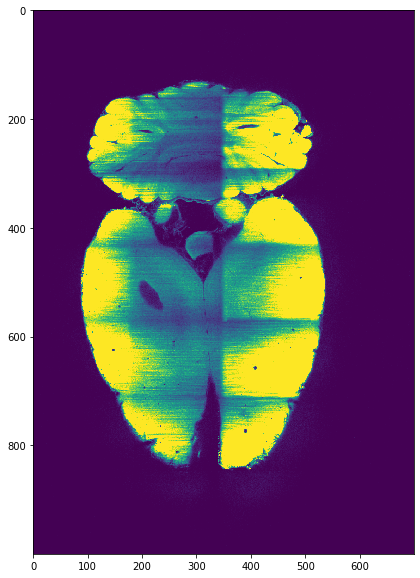

In [30]:
res = cv2.resize(z_plane, dsize=(700, 1000), interpolation=cv2.INTER_CUBIC)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(res,vmin=0,vmax=800)

In [19]:
subvol.shape

(50, 10492, 713)

## Take a look at the flat file

In [44]:
flat_file = os.path.join(data_dir,"Ex_488_Em_0_stitched","flat.tiff")

In [45]:
flat = tifffile.imread(flat_file)

In [46]:
flat.shape

(10492, 7613)

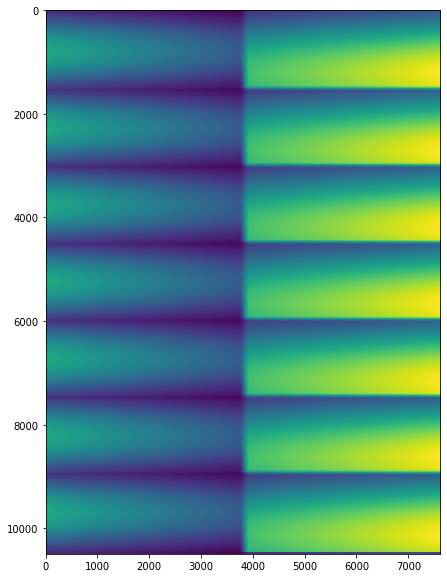

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(flat)

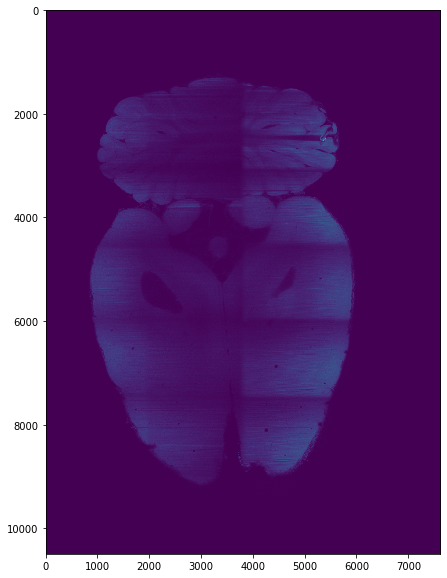

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(z_plane)